        C1/C2
58   0.155280
59   0.508142
60   0.257295
62   0.387424
63   0.276891
..        ...
209  0.351037
210  0.423453
211  0.257563
212  0.331507
213  0.341560

[140 rows x 1 columns]
The average silhouette_score is : 0.20801393818258304
Number of clusters formed is :  8


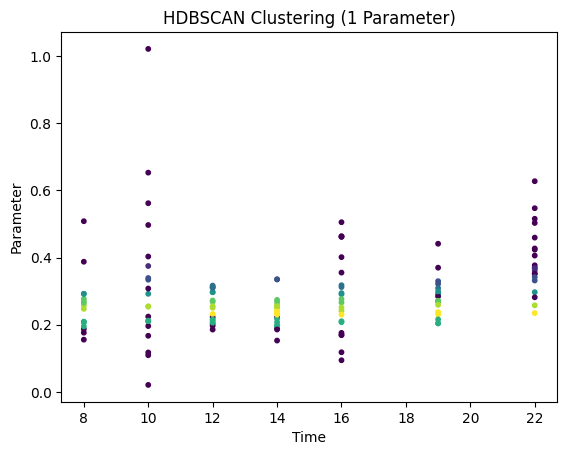

In [246]:
import pandas as pd
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D

# Load the CSV file into a DataFrame with headers and specify encoding
csv = pd.read_csv('Aggregated_data_E2.csv', encoding='latin1')

#create two dataframes from dataset
df=csv
df2=csv

#setup columns of interest
columns = [17] #clustering parameters
columns2 = [1, 2, 17, 18, 45, 108] #paramters of interest, 1 = Condition, 2 = Time, 17=Ion Leakage, 18 = Soil Moisture, 45 = Mean RWC, 108 = Mean Leaef Thickness

#filter df and df2 according to columns
df = df.iloc[:, columns]
df2 = df2.iloc[:, columns2] 

#remove rows that don't have values for all clustering parameters
df = df.dropna()

# Display the DataFrame
print(df)

# Perform HDBSCAN clustering
## https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
#clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, metric='hamming', alpha=1.0) #hdbscan using hamming distance instead of Euclidean (unused)
clusterer = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=5, metric='euclidean', alpha=1.0) #change 'min_cluster_size' and 'min_samples' to control clusters formed
clusters = clusterer.fit_predict(df)

# Compute silhouette score
silhouette_avg = silhouette_score(df, clusters)
print("The average silhouette_score is :", silhouette_avg)

# Apply PCA for dimensionality reduction (for 3 parameters and up)
#pca = PCA(n_components=2)
#components = pca.fit_transform(df)

#print number of clusters formed
unique_clusters = np.unique(clusters)
print("Number of clusters formed is : ", len(unique_clusters)-1) #-1 to account for noise cluster, which has a value of '-1' in 'clusters'

#Filter time column to plot clusters against
cluster_times = df2.loc[df.index]

# Create a scatter plot of the clustered data
plt.scatter(cluster_times.iloc[:,1], df.iloc[:, 0], c=clusters, cmap='viridis', marker='o', s=10)
plt.xlabel('Time')
plt.ylabel('Parameter')
plt.title('HDBSCAN Clustering (1 Parameter)')

plt.show()


[-1 -1  0 -1  0 -1 -1  0  0  0  0  0  0  0  0  0  0 -1 -1  0 -1 -1  0 -1
  0  0 -1 -1 -1 -1  0 -1 -1  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1  0  0  0 -1
 -1  0 -1 -1  0  0  0 -1  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0
 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1]


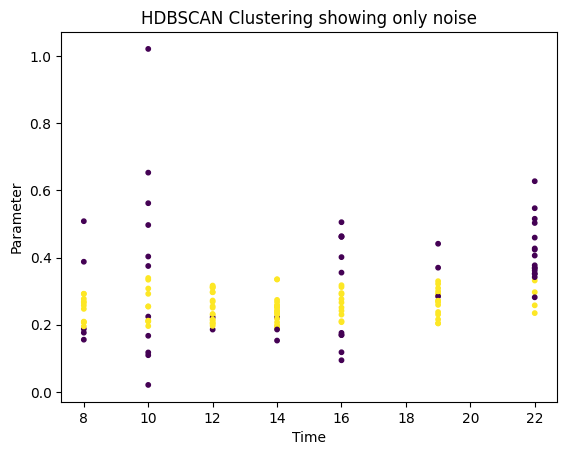

In [43]:
#Code to visualise noise vs not noise from previous figure
##NOTE: running this code makes you need to rerun the previous cell to make later parts work.
single_clus = clusters

#change all non-noise cluster values to 0
single_clus[~np.isin(single_clus, [-1])] = 0
print(single_clus)

#alternative code for visualising individual clusters
#cluster_of_interest = 5
#single_clus[single_clus != cluster_of_interest] = 0 

plt.scatter(cluster_times.iloc[:,0], df.iloc[:, 0], c=clusters, cmap='viridis', marker='o', s=10)
plt.xlabel('Time')
plt.ylabel('Parameter')
plt.title('HDBSCAN Clustering showing only noise')

plt.show()

In [293]:
#Code to see data of inidividual clusters
df_filtered0 = df[clusters == 0]
df_filtered1 = df[clusters == 1] 
df_filtered2 = df[clusters == 2] 
df_filtered3 = df[clusters == 3] 
df_filtered4 = df[clusters == 4] 
df_filtered5 = df[clusters == 5] 
df_filtered6 = df[clusters == 6]
df_filtered7 = df[clusters == 7]
df_filtered8 = df[clusters == 8]
df_filtered9 = df[clusters == 9]
df_filtered10 = df[clusters == 10]
df_filtered11 = df[clusters == 11]

In [294]:
# Display the filtered DataFrame
csv_filtered = csv.loc[df_filtered11.index]

# Display the filtered DataFrame
print(csv_filtered)

Standard Deviation of Wet_Mean column: 0.2780700223225981
         Date Condition  Time  Tray Plant   Hour_m1  µS/cm_m1  °C_m1  \
2    20240112   Control     1   2.0     G       NaN       NaN    NaN   
4    20240112   Control     1   5.0     G       NaN       NaN    NaN   
16   20240116   Control     5   1.0     E  18:21:33     5.812   20.7   
24   20240116   Control     5   7.0     J  18:35:45     0.994   20.8   
78   20240121   Control    10   3.0     F  21:28:40     9.738   21.5   
84   20240121   Control    10   7.0     F  21:39:11     6.754   22.1   
98   20240123   Control    12   1.0     A  20:49:42    12.820   21.1   
123  20240125   Control    14   3.0     B  22:04:20    10.970   21.0   
124  20240125   Control    14   3.0     D  22:05:10    17.700   21.0   
130  20240125   Control    14   5.0     I  22:11:11     6.196   21.2   
135  20240125   Control    14   9.0     I  22:22:52    13.560   21.2   
136  20240125   Control    14  11.0     B  22:24:22    15.140   21.1   
137  2

In [180]:
#Code to find standard deviation of a a parameter of a cluster
std_column = 'Wet_Mean'
std_dev = csv_filtered[std_column].std()

print("Standard Deviation of", std_column, "column:", std_dev)

Standard Deviation of Wet_Mean column: 32.764866004963594


In [ ]:
#Loop for finding all standard deviations of a parameters for all clusters
for i in range(0,len(unique_clusters)-1):
    df_filtered = df[clusters == i]
    csv_filtered = csv.loc[df_filtered.index]
    std_column = 'Wet_Mean' #parameter of interest
    std_dev = csv_filtered[std_column].std()

    print("Standard Deviation of", std_column, "column for cluster", i, ":", std_dev)


    Condition  Time     C1/C2   Wet_Mean  Mean RWC  Mean_Thickness
0     Control     1       NaN  66.366667  0.851852             NaN
1     Control     1       NaN  55.766667  0.875000             NaN
2     Control     1       NaN  69.200000       NaN             NaN
3     Control     1       NaN  67.166667       NaN             NaN
4     Control     1       NaN  69.100000  0.833333             NaN
..        ...   ...       ...        ...       ...             ...
209   Drought    22  0.351037   4.566667  0.682620           0.165
210   Control    22  0.423453  71.300000  0.785317           0.525
211   Control    22  0.257563  63.066667  0.776834           0.230
212   Drought    22  0.331507   5.866667  0.686819           0.215
213   Drought    22  0.341560   6.400000  0.713454           0.195

[214 rows x 6 columns]


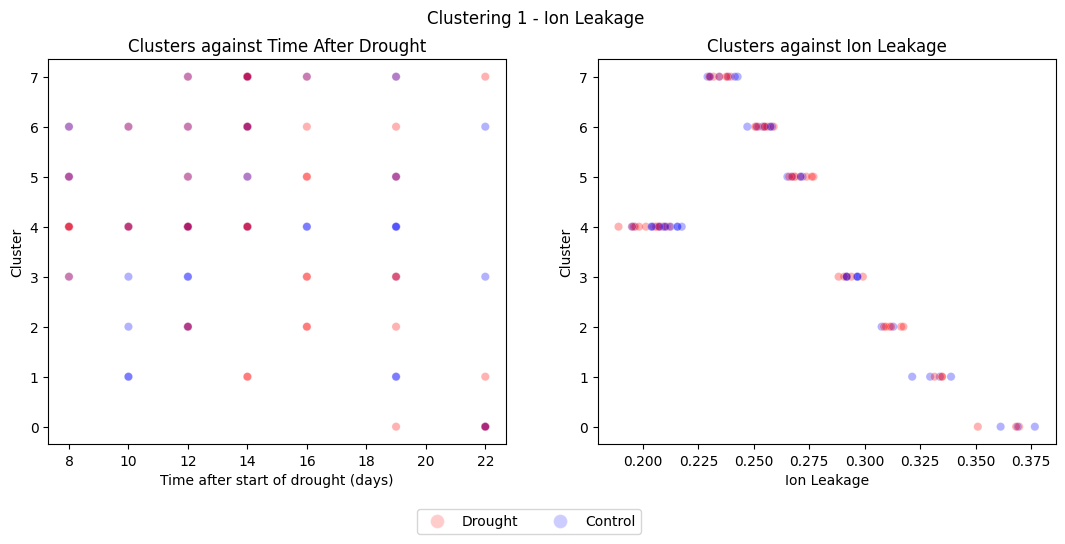

In [203]:
#Code for visualising clusters against a parameter
#Setup figures
fig, axes = plt.subplots(1, 2,  figsize=(13, 5))
fig.suptitle('Clustering 1a - Ion Leakage')
custom_palette = {"Control": "blue", "Drought": "red"}

#Plot clusters against time after drought
axes[0].set_title('Clusters against Time After Drought')
for i in range (0, len(unique_clusters)-1):
    df_filtered = df[clusters == i]
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[0], data=filtered_df2, x='Time', y=i, hue = 'Condition', palette=custom_palette, alpha=0.3,legend=False)
axes[0].set_xlabel('Time after start of drought (days)')
axes[0].set_ylabel('Cluster')

#Plot clusters against a parameter
comp_parameter = 'C1/C2' #comparison parameter
axes[1].set_title('Clusters against Ion Leakage')
for i in range (0, len(unique_clusters)-1):
    df_filtered = df[clusters == i]
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[1], data=filtered_df2, x=comp_parameter, y=i, hue = 'Condition', palette=custom_palette, alpha=0.3)
axes[1].set_xlabel('Ion Leakage')
axes[1].set_ylabel('Cluster')

print(df2)

#Set up legends
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, alpha=0.2, label='Drought'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, alpha=0.2, label='Control')]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(-0.15, -0.15), ncol=3)


    Condition  Time     C1/C2   Wet_Mean  Mean RWC  Mean_Thickness
0     Control     1       NaN  66.366667  0.851852             NaN
1     Control     1       NaN  55.766667  0.875000             NaN
2     Control     1       NaN  69.200000       NaN             NaN
3     Control     1       NaN  67.166667       NaN             NaN
4     Control     1       NaN  69.100000  0.833333             NaN
..        ...   ...       ...        ...       ...             ...
209   Drought    22  0.351037   4.566667  0.682620           0.165
210   Control    22  0.423453  71.300000  0.785317           0.525
211   Control    22  0.257563  63.066667  0.776834           0.230
212   Drought    22  0.331507   5.866667  0.686819           0.215
213   Drought    22  0.341560   6.400000  0.713454           0.195

[214 rows x 6 columns]


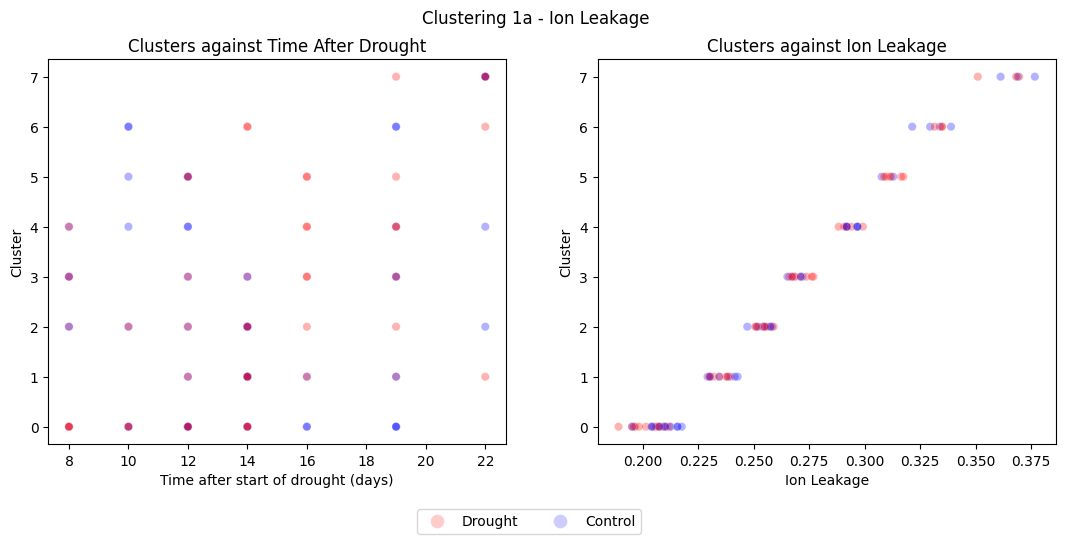

In [147]:
#Code for visualising clusters against a parameter, but with reordered clusters
#Setup figures
fig, axes = plt.subplots(1, 2,  figsize=(13, 5))
fig.suptitle('Clustering 1a - Ion Leakage')
custom_palette = {"Control": "blue", "Drought": "red"}
new_order = [7,6,5,4,0,3,2,1]

#Plot clusters against time after drought
axes[0].set_title('Clusters against Time After Drought')
j = 0
for i in new_order:
    df_filtered = df[clusters == j]
    j += 1
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[0], data=filtered_df2, x='Time', y=i, hue = 'Condition', palette=custom_palette, alpha=0.3,legend=False)
axes[0].set_xlabel('Time after start of drought (days)')
axes[0].set_ylabel('Cluster')

#Plot clusters against a parameter
comp_parameter = 'C1/C2' #comparison parameter
axes[1].set_title('Clusters against Ion Leakage')
j = 0
for i in new_order:
    df_filtered = df[clusters == j]
    j += 1
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[1], data=filtered_df2, x=comp_parameter, y=i, hue = 'Condition', palette=custom_palette, alpha=0.3)
axes[1].set_xlabel('Ion Leakage')
axes[1].set_ylabel('Cluster')

print(df2)

#Set up legends
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, alpha=0.2, label='Drought'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, alpha=0.2, label='Control')]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(-0.15, -0.15), ncol=3)


      Wet_Mean
0    66.366667
1    55.766667
2    69.200000
3    67.166667
4    69.100000
..         ...
209   4.566667
210  71.300000
211  63.066667
212   5.866667
213   6.400000

[188 rows x 1 columns]
The average silhouette_score is : 0.3399305287981892
Number of clusters formed is :  12


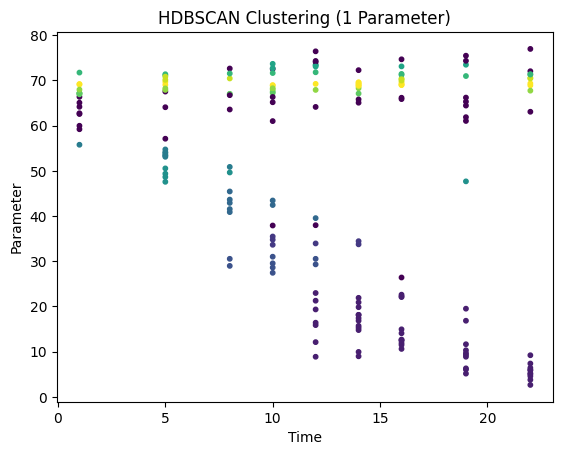

In [289]:
import pandas as pd
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D

# Load the CSV file into a DataFrame with headers and specify encoding
csv = pd.read_csv('Aggregated_data_E2.csv', encoding='latin1')

#create two dataframes from dataset
df=csv
df2=csv

#setup columns of interest
columns = [18] #clustering parameters
columns2 = [1, 2, 17, 18, 45, 108] #paramters of interest, 1 = Condition, 2 = Time, 17=Ion Leakage, 18 = Soil Moisture, 45 = Mean RWC, 108 = Mean Leaef Thickness

#filter df and df2 according to columns
df = df.iloc[:, columns]
df2 = df2.iloc[:, columns2] 

#remove rows that don't have values for all clustering parameters
df = df.dropna()

# Display the DataFrame
print(df)

# Perform HDBSCAN clustering
## https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
#clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, metric='hamming', alpha=1.0) #hdbscan using hamming distance instead of Euclidean (unused)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5, metric='euclidean', alpha=1.0) #change 'min_cluster_size' and 'min_samples' to control clusters formed
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, min_samples=4, metric='euclidean', alpha=1.0) #12 clusters
clusters = clusterer.fit_predict(df)

# Compute silhouette score
silhouette_avg = silhouette_score(df, clusters)
print("The average silhouette_score is :", silhouette_avg)

# Apply PCA for dimensionality reduction (for 3 parameters and up)
#pca = PCA(n_components=2)
#components = pca.fit_transform(df)

#print number of clusters formed
unique_clusters = np.unique(clusters)
print("Number of clusters formed is : ", len(unique_clusters)-1) #-1 to account for noise cluster, which has a value of '-1' in 'clusters'

#Filter time column to plot clusters against
cluster_times = df2.loc[df.index]

# Create a scatter plot of the clustered data
plt.scatter(cluster_times.iloc[:,1], df.iloc[:, 0], c=clusters, cmap='viridis', marker='o', s=10)
plt.xlabel('Time')
plt.ylabel('Parameter')
plt.title('HDBSCAN Clustering (1 Parameter)')

plt.show()


    Condition  Time     C1/C2   Wet_Mean  Mean RWC  Mean_Thickness
0     Control     1       NaN  66.366667  0.851852             NaN
1     Control     1       NaN  55.766667  0.875000             NaN
2     Control     1       NaN  69.200000       NaN             NaN
3     Control     1       NaN  67.166667       NaN             NaN
4     Control     1       NaN  69.100000  0.833333             NaN
..        ...   ...       ...        ...       ...             ...
209   Drought    22  0.351037   4.566667  0.682620           0.165
210   Control    22  0.423453  71.300000  0.785317           0.525
211   Control    22  0.257563  63.066667  0.776834           0.230
212   Drought    22  0.331507   5.866667  0.686819           0.215
213   Drought    22  0.341560   6.400000  0.713454           0.195

[214 rows x 6 columns]


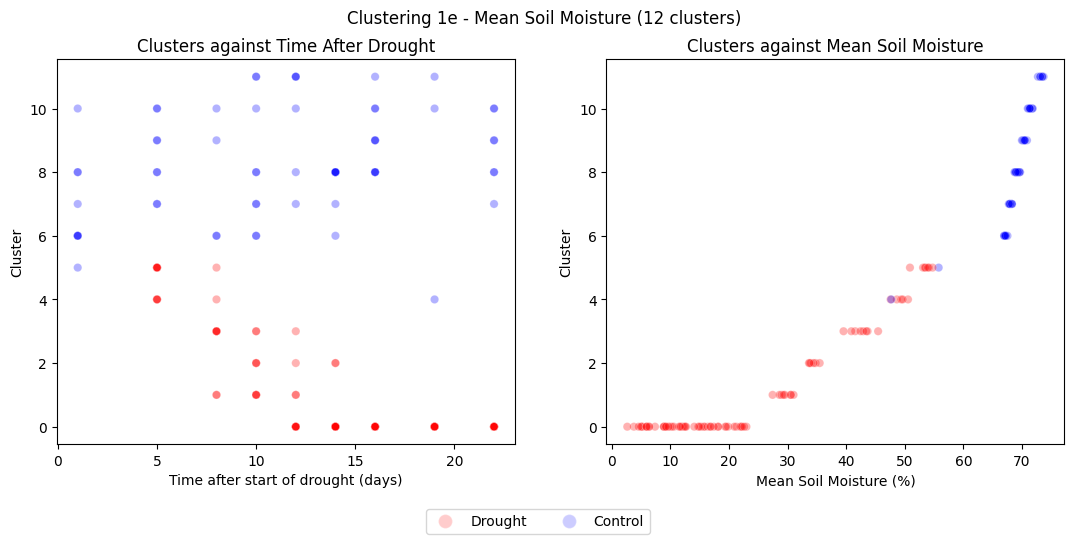

In [290]:
#Code for visualising clusters against a parameter, but with reordered clusters
#Setup figures
fig, axes = plt.subplots(1, 2,  figsize=(13, 5))
#fig.suptitle('Clustering 1b - Mean Soil Moisture')
fig.suptitle('Clustering 1e - Mean Soil Moisture (12 clusters)')
custom_palette = {"Control": "blue", "Drought": "red"}
#new_order = [0,1,2,3,4,5,6,7,8,9,10,11]
new_order = [0,2,1,3,5,4,11,10,6,7,9,8]
#new_order = [0,2,1,6,3,5,4]

#Plot clusters against time after drought
axes[0].set_title('Clusters against Time After Drought')
j = 0
for i in new_order:
    df_filtered = df[clusters == j]
    j += 1
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[0], data=filtered_df2, x='Time', y=i, hue = 'Condition', palette=custom_palette, alpha=0.3,legend=False)
axes[0].set_xlabel('Time after start of drought (days)')
axes[0].set_ylabel('Cluster')

#Plot clusters against a parameter
comp_parameter = 'Wet_Mean' #comparison parameter
axes[1].set_title('Clusters against Mean Soil Moisture')
j = 0
for i in new_order:
    df_filtered = df[clusters == j]
    j += 1
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[1], data=filtered_df2, x=comp_parameter, y=i, hue = 'Condition', palette=custom_palette, alpha=0.3)
axes[1].set_xlabel('Mean Soil Moisture (%)')
axes[1].set_ylabel('Cluster')

print(df2)

#Set up legends
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, alpha=0.2, label='Drought'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, alpha=0.2, label='Control')]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(-0.15, -0.15), ncol=3)


     Mean RWC
0    0.851852
1    0.875000
4    0.833333
5    0.826667
6    0.855263
..        ...
209  0.682620
210  0.785317
211  0.776834
212  0.686819
213  0.713454

[174 rows x 1 columns]
The average silhouette_score is : 0.19451495278566286
Number of clusters formed is :  8


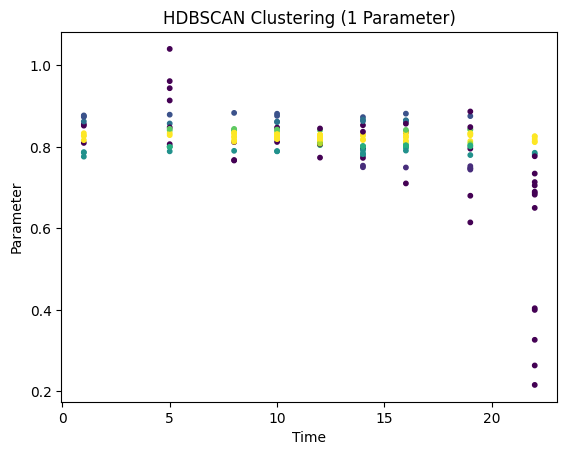

In [221]:
import pandas as pd
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D

# Load the CSV file into a DataFrame with headers and specify encoding
csv = pd.read_csv('Aggregated_data_E2.csv', encoding='latin1')

#create two dataframes from dataset
df=csv
df2=csv

#setup columns of interest
columns = [45] #clustering parameters
columns2 = [1, 2, 17, 18, 45, 108] #paramters of interest, 1 = Condition, 2 = Time, 17=Ion Leakage, 18 = Soil Moisture, 45 = Mean RWC, 108 = Mean Leaef Thickness

#filter df and df2 according to columns
df = df.iloc[:, columns]
df2 = df2.iloc[:, columns2] 

#remove rows that don't have values for all clustering parameters
df = df.dropna()

# Display the DataFrame
print(df)

# Perform HDBSCAN clustering
## https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
#clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, metric='hamming', alpha=1.0) #hdbscan using hamming distance instead of Euclidean (unused)
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5, metric='euclidean', alpha=1.0) #change 'min_cluster_size' and 'min_samples' to control clusters formed
clusters = clusterer.fit_predict(df)

# Compute silhouette score
silhouette_avg = silhouette_score(df, clusters)
print("The average silhouette_score is :", silhouette_avg)

# Apply PCA for dimensionality reduction (for 3 parameters and up)
#pca = PCA(n_components=2)
#components = pca.fit_transform(df)

#print number of clusters formed
unique_clusters = np.unique(clusters)
print("Number of clusters formed is : ", len(unique_clusters)-1) #-1 to account for noise cluster, which has a value of '-1' in 'clusters'

#Filter time column to plot clusters against
cluster_times = df2.loc[df.index]

# Create a scatter plot of the clustered data
plt.scatter(cluster_times.iloc[:,1], df.iloc[:, 0], c=clusters, cmap='viridis', marker='o', s=10)
plt.xlabel('Time')
plt.ylabel('Parameter')
plt.title('HDBSCAN Clustering (1 Parameter)')

plt.show()


    Condition  Time     C1/C2   Wet_Mean  Mean RWC  Mean_Thickness
0     Control     1       NaN  66.366667  0.851852             NaN
1     Control     1       NaN  55.766667  0.875000             NaN
2     Control     1       NaN  69.200000       NaN             NaN
3     Control     1       NaN  67.166667       NaN             NaN
4     Control     1       NaN  69.100000  0.833333             NaN
..        ...   ...       ...        ...       ...             ...
209   Drought    22  0.351037   4.566667  0.682620           0.165
210   Control    22  0.423453  71.300000  0.785317           0.525
211   Control    22  0.257563  63.066667  0.776834           0.230
212   Drought    22  0.331507   5.866667  0.686819           0.215
213   Drought    22  0.341560   6.400000  0.713454           0.195

[214 rows x 6 columns]


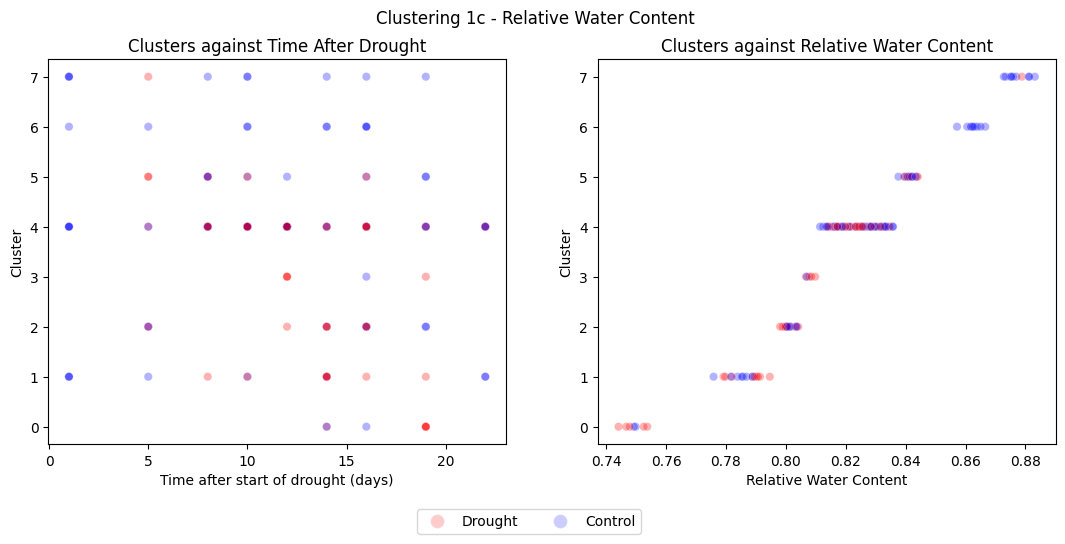

In [222]:
#Code for visualising clusters against a parameter, but with reordered clusters
#Setup figures
fig, axes = plt.subplots(1, 2,  figsize=(13, 5))
fig.suptitle('Clustering 1c - Relative Water Content')
custom_palette = {"Control": "blue", "Drought": "red"}
#new_order = [0,1,2,3,4,5,6,7]
new_order = [0,7,6,1,2,5,3,4]

#Plot clusters against time after drought
axes[0].set_title('Clusters against Time After Drought')
j = 0
for i in new_order:
    df_filtered = df[clusters == j]
    j += 1
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[0], data=filtered_df2, x='Time', y=i, hue = 'Condition', palette=custom_palette, alpha=0.3,legend=False)
axes[0].set_xlabel('Time after start of drought (days)')
axes[0].set_ylabel('Cluster')

#Plot clusters against a parameter
comp_parameter = 'Mean RWC' #comparison parameter
axes[1].set_title('Clusters against Relative Water Content')
j = 0
for i in new_order:
    df_filtered = df[clusters == j]
    j += 1
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[1], data=filtered_df2, x=comp_parameter, y=i, hue = 'Condition', palette=custom_palette, alpha=0.3)
axes[1].set_xlabel('Relative Water Content')
axes[1].set_ylabel('Cluster')

print(df2)

#Set up legends
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, alpha=0.2, label='Drought'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, alpha=0.2, label='Control')]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(-0.15, -0.15), ncol=3)


     Mean_Thickness
5             0.000
6             0.000
12            0.100
13            0.120
14            0.000
..              ...
209           0.165
210           0.525
211           0.230
212           0.215
213           0.195

[156 rows x 1 columns]
The average silhouette_score is : 0.36035121773295076
Number of clusters formed is :  9


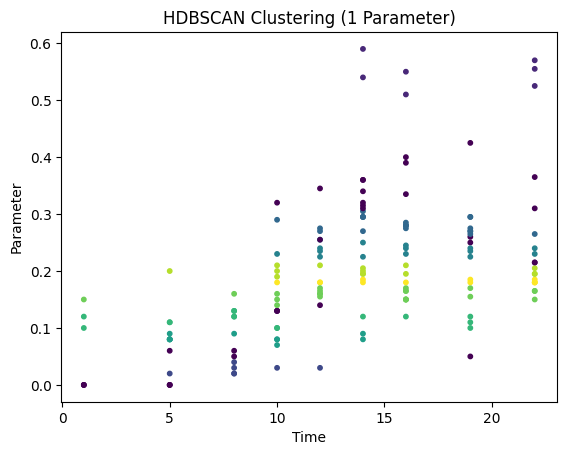

In [234]:
import pandas as pd
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D

# Load the CSV file into a DataFrame with headers and specify encoding
csv = pd.read_csv('Aggregated_data_E2.csv', encoding='latin1')

#create two dataframes from dataset
df=csv
df2=csv

#setup columns of interest
columns = [108] #clustering parameters
columns2 = [1, 2, 17, 18, 45, 108] #paramters of interest, 1 = Condition, 2 = Time, 17=Ion Leakage, 18 = Soil Moisture, 45 = Mean RWC, 108 = Mean Leaef Thickness

#filter df and df2 according to columns
df = df.iloc[:, columns]
df2 = df2.iloc[:, columns2] 

#remove rows that don't have values for all clustering parameters
df = df.dropna()

# Display the DataFrame
print(df)

# Perform HDBSCAN clustering
## https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
#clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, metric='hamming', alpha=1.0) #hdbscan using hamming distance instead of Euclidean (unused)
clusterer = hdbscan.HDBSCAN(min_cluster_size=7, min_samples=5, metric='euclidean', alpha=1.0) #change 'min_cluster_size' and 'min_samples' to control clusters formed
clusters = clusterer.fit_predict(df)

# Compute silhouette score
silhouette_avg = silhouette_score(df, clusters)
print("The average silhouette_score is :", silhouette_avg)

# Apply PCA for dimensionality reduction (for 3 parameters and up)
#pca = PCA(n_components=2)
#components = pca.fit_transform(df)

#print number of clusters formed
unique_clusters = np.unique(clusters)
print("Number of clusters formed is : ", len(unique_clusters)-1) #-1 to account for noise cluster, which has a value of '-1' in 'clusters'

#Filter time column to plot clusters against
cluster_times = df2.loc[df.index]

# Create a scatter plot of the clustered data
plt.scatter(cluster_times.iloc[:,1], df.iloc[:, 0], c=clusters, cmap='viridis', marker='o', s=10)
plt.xlabel('Time')
plt.ylabel('Parameter')
plt.title('HDBSCAN Clustering (1 Parameter)')

plt.show()


    Condition  Time     C1/C2   Wet_Mean  Mean RWC  Mean_Thickness
0     Control     1       NaN  66.366667  0.851852             NaN
1     Control     1       NaN  55.766667  0.875000             NaN
2     Control     1       NaN  69.200000       NaN             NaN
3     Control     1       NaN  67.166667       NaN             NaN
4     Control     1       NaN  69.100000  0.833333             NaN
..        ...   ...       ...        ...       ...             ...
209   Drought    22  0.351037   4.566667  0.682620           0.165
210   Control    22  0.423453  71.300000  0.785317           0.525
211   Control    22  0.257563  63.066667  0.776834           0.230
212   Drought    22  0.331507   5.866667  0.686819           0.215
213   Drought    22  0.341560   6.400000  0.713454           0.195

[214 rows x 6 columns]


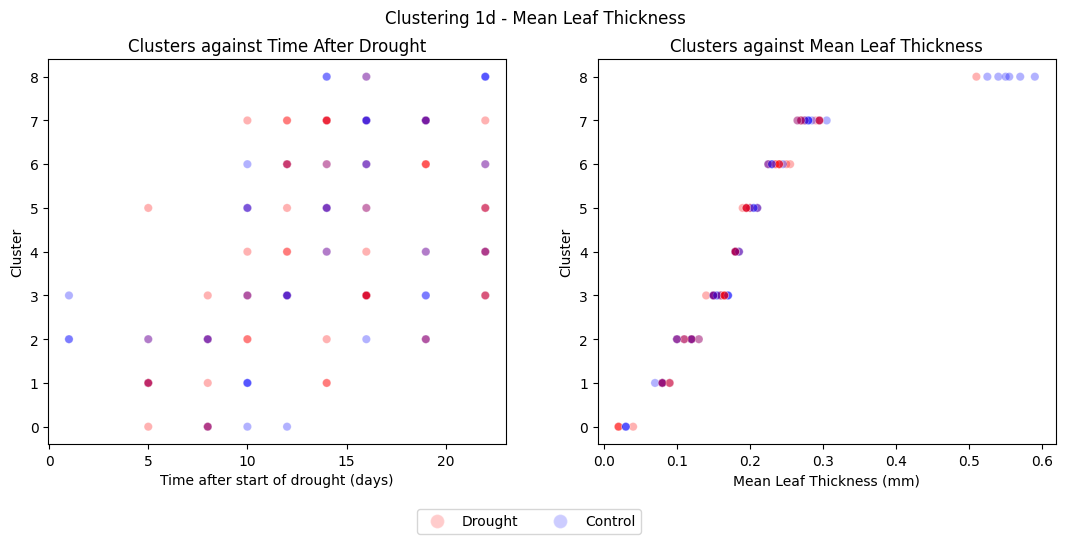

In [235]:
#Code for visualising clusters against a parameter, but with reordered clusters
#Setup figures
fig, axes = plt.subplots(1, 2,  figsize=(13, 5))
fig.suptitle('Clustering 1d - Mean Leaf Thickness')
custom_palette = {"Control": "blue", "Drought": "red"}
#new_order = [0,1,2,3,4,5,6,7,8]
new_order = [8,0,7,6,1,2,3,5,4]

#Plot clusters against time after drought
axes[0].set_title('Clusters against Time After Drought')
j = 0
for i in new_order:
    df_filtered = df[clusters == j]
    j += 1
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[0], data=filtered_df2, x='Time', y=i, hue = 'Condition', palette=custom_palette, alpha=0.3,legend=False)
axes[0].set_xlabel('Time after start of drought (days)')
axes[0].set_ylabel('Cluster')

#Plot clusters against a parameter
comp_parameter = 'Mean_Thickness' #comparison parameter
axes[1].set_title('Clusters against Mean Leaf Thickness')
j = 0
for i in new_order:
    df_filtered = df[clusters == j]
    j += 1
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[1], data=filtered_df2, x=comp_parameter, y=i, hue = 'Condition', palette=custom_palette, alpha=0.3)
axes[1].set_xlabel('Mean Leaf Thickness (mm)')
axes[1].set_ylabel('Cluster')

print(df2)

#Set up legends
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, alpha=0.2, label='Drought'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, alpha=0.2, label='Control')]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(-0.15, -0.15), ncol=3)
